In [6]:
!pip install kaggle

In [7]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle (1).json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c phi2018task3

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
y_train.npy: Skipping, found more recently modified local copy (use --force to force download)
X_test.npy.zip: Skipping, found more recently modified local copy (use --force to force download)
X_train.npy.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!ls
!unzip X_train.npy
!unzip X_test.npy

'kaggle (1).json'   sample_submission.csv	   X_train.npy.zip
 kaggle.json	    VGG16-transferlearning.model   y_train.npy
 sample_data	    X_test.npy.zip
Archive:  X_train.npy.zip
  inflating: X_train.npy             
Archive:  X_test.npy.zip
  inflating: X_test.npy              


In [11]:
import numpy as np
X1 = np.load('X_train.npy')
print(X1.shape)
X_test = np.load('X_test.npy')
print(X_test.shape)
y_train1 = np.load('y_train.npy')
print(y_train1.shape)

(3294, 224, 224, 3)
(824, 224, 224, 3)
(3294,)


In [8]:
print(y_train1)

[0 1 0 ... 0 1 0]


In [0]:
y_test = []
print(X_test.shape[0])
for i in range(X_test.shape[0]):
  y_test.append(1)
  

print(y_test)

824
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [0]:
y_test = np.array((y_test))

In [0]:
print(y_test.shape)

(824,)


In [12]:
def y_out(y, num_classes = 2):
  y1 = np.zeros((y.shape[0],num_classes))
  for i in range(len(y)):
    y1[i,y[i]] = 1
  
  return y1


y_train1 = y_out(y_train1)
y_train = y_train1[:2800]
y_val = y_train1[2800:]
X_train = X1[:2800]
X_val = X1[2800:]
print(X_train.shape)
print(X_val.shape)

(2800, 224, 224, 3)
(494, 224, 224, 3)


In [13]:
print(y_train.shape)
print(y_val.shape)

(2800, 2)
(494, 2)


In [14]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import optimizers
from keras.layers import Dense, Flatten, Activation, Dropout
from keras import applications
from keras.applications import VGG16, InceptionV3, ResNet50

image_size = 224

vgg_conv =  VGG16(weights = 'imagenet', include_top = False, input_shape=(image_size, image_size, 3))

vgg_conv.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

In [17]:
from keras.models import Sequential, Model, load_model

#vgg_conv.load_weights(weights_path)

x = Flatten()(vgg_conv.get_layer('block5_pool').output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

model = Model(inputs = vgg_conv.input, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [18]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

batch_size = 50
epochs = 30

train_datagen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip=True)

history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size = batch_size),
                             steps_per_epoch = X_train.shape[0] // batch_size,
                             epochs = epochs,
                             validation_data = (X_val, y_val),
                             callbacks=[ModelCheckpoint('VGG16-transferlearning.model', monitor='val_acc', save_best_only=True)])

Epoch 1/30
56/56 [==============================] - 107s 2s/step - loss: 0.9821 - acc: 0.5818 - val_loss: 0.6023 - val_acc: 0.7004
Epoch 2/30
56/56 [==============================] - 85s 2s/step - loss: 0.6286 - acc: 0.6586 - val_loss: 0.5716 - val_acc: 0.7186
Epoch 3/30
56/56 [==============================] - 85s 2s/step - loss: 0.5928 - acc: 0.7100 - val_loss: 0.5158 - val_acc: 0.7571
Epoch 4/30
56/56 [==============================] - 85s 2s/step - loss: 0.5590 - acc: 0.7286 - val_loss: 0.5400 - val_acc: 0.7287
Epoch 5/30
56/56 [==============================] - 85s 2s/step - loss: 0.5031 - acc: 0.7629 - val_loss: 0.4688 - val_acc: 0.7834
Epoch 6/30
56/56 [==============================] - 85s 2s/step - loss: 0.4735 - acc: 0.7829 - val_loss: 0.4930 - val_acc: 0.7632
Epoch 7/30
56/56 [==============================] - 86s 2s/step - loss: 0.4602 - acc: 0.7868 - val_loss: 0.4407 - val_acc: 0.8016
Epoch 8/30
56/56 [==============================] - 86s 2s/step - loss: 0.4502 - acc: 0.7

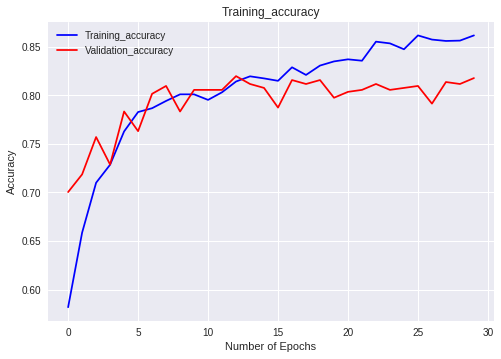

<Figure size 576x396 with 0 Axes>

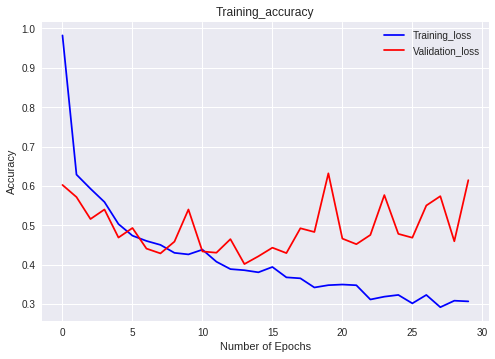

In [19]:
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']



epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label = 'Training_accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation_accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training_accuracy')
plt.legend()

plt.figure()
plt.show()

print(" ")
print(" ")

plt.plot(epochs, train_loss, 'b', label = 'Training_loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation_loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training_accuracy')
plt.legend()